In [1]:
##installing data packages####
library('tidyverse')
library('lubridate')


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
#Load CSV files for analysis ##
q4_2019 <- read_csv("../input/ride-share-data/Divvy_Trips_2019_Q4/Divvy_Trips_2019_Q4.csv")
q3_2019 <- read_csv("../input/ride-share-data/Divvy_Trips_2019_Q3/Divvy_Trips_2019_Q3.csv")
q2_2019 <- read_csv("../input/ride-share-data/Divvy_Trips_2019_Q2 (1)/Divvy_Trips_2019_Q2.csv")
q1_2020 <- read_csv("../input/ride-share-data/Divvy_Trips_2020_Q1 (1)/Divvy_Trips_2020_Q1.csv")
########################################################


Rows: 704054 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
dttm (2): start_time, end_time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1640718 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): from_station_name, to_station_name, usertype, gender
dbl  (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
dttm (2): start_time, end_time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 1108163 Columns: 12

── Column specification ────────────────────────────────────────────────────────
Delimit

In [3]:
#### Wrangle data and combine into one file ###
colnames(q3_2019)
colnames(q4_2019)
colnames(q2_2019)
colnames(q1_2020)

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "01 - Rental Details Rental ID"                   
 [2] "01 - Rental Details Local Start Time"            
 [3] "01 - Rental Details Local End Time"              
 [4] "01 - Rental Details Bike ID"                     
 [5] "01 - Rental Details Duration In Seconds Uncapped"
 [6] "03 - Rental Start Station ID"                    
 [7] "03 - Rental Start Station Name"                  
 [8] "02 - Rental End Station ID"                      
 [9] "02 - Rental End Station Name"                    
[10] "User Type"                                       
[11] "Member Gender"                                   
[12] "05 - Member Details Member Birthday Year"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

In [4]:
## Rename columns to be consistent with Q1_2020 ####
(q4_2019 <- rename(q4_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))


(q3_2019 <- rename(q3_2019
                   ,ride_id = trip_id
                   ,rideable_type = bikeid 
                   ,started_at = start_time  
                   ,ended_at = end_time  
                   ,start_station_name = from_station_name 
                   ,start_station_id = from_station_id 
                   ,end_station_name = to_station_name 
                   ,end_station_id = to_station_id 
                   ,member_casual = usertype))

(q2_2019 <- rename(q2_2019
                   ,ride_id = "01 - Rental Details Rental ID"
                   ,rideable_type = "01 - Rental Details Bike ID" 
                   ,started_at = "01 - Rental Details Local Start Time"  
                   ,ended_at = "01 - Rental Details Local End Time"  
                   ,start_station_name = "03 - Rental Start Station Name" 
                   ,start_station_id = "03 - Rental Start Station ID"
                   ,end_station_name = "02 - Rental End Station Name" 
                   ,end_station_id = "02 - Rental End Station ID"
                   ,member_casual = "User Type"))
##########################################################################



ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,2350,313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,1867,210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,1072,84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,1458,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,1437,156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


ride_id,started_at,ended_at,rideable_type,tripduration,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,gender,birthyear
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,1214,117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,1048,381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NA,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,1554,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,1503,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,1213,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,1248,168,Michigan Ave & 14th St,62,McCormick Place,Customer,NA,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,1550,313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NA,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,1583,43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,NA,NA


ride_id,started_at,ended_at,rideable_type,01 - Rental Details Duration In Seconds Uncapped,start_station_id,start_station_name,end_station_id,end_station_name,member_casual,Member Gender,05 - Member Details Member Birthday Year
<dbl>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,1048,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,1007,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,2137,211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,NA,NA


In [5]:
## Check the data frames for consistency#################################
str(q1_2020)
str(q4_2019)
str(q3_2019)
str(q2_2019)

spec_tbl_df [426,887 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:426887] "EACB19130B0CDA4A" "8FED874C809DC021" "789F3C21E472CA96" "C9A388DAC6ABF313" ...
 $ rideable_type     : chr [1:426887] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:426887], format: "2020-01-21 20:06:59" "2020-01-30 14:22:39" ...
 $ ended_at          : POSIXct[1:426887], format: "2020-01-21 20:14:30" "2020-01-30 14:26:22" ...
 $ start_station_name: chr [1:426887] "Western Ave & Leland Ave" "Clark St & Montrose Ave" "Broadway & Belmont Ave" "Clark St & Randolph St" ...
 $ start_station_id  : num [1:426887] 239 234 296 51 66 212 96 96 212 38 ...
 $ end_station_name  : chr [1:426887] "Clark St & Leland Ave" "Southport Ave & Irving Park Rd" "Wilton Ave & Belmont Ave" "Fairbanks Ct & Grand Ave" ...
 $ end_station_id    : num [1:426887] 326 318 117 24 212 96 212 212 96 100 ...
 $ start_lat         : num [1:426887] 42 42 41.9 41.9 41.9 ...
 $ s

In [6]:
#### Convert columns to make it easier to stack ############################
q4_2019 <-  mutate(q4_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

q3_2019 <-  mutate(q3_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 

q2_2019 <-  mutate(q2_2019, ride_id = as.character(ride_id)
                   ,rideable_type = as.character(rideable_type)) 




In [7]:
#####Reproduce date made to replicate large data set#######################################

t4_2019 <- head(q4_2019, 6)
t3_2019 <- head(q3_2019, 6)
t2_2019 <- head(q2_2019, 6)
t1_2020 <- head(q4_2019, 6)

In [8]:
## Stack tables into one data table#################################
total_rides <- bind_rows(t2_2019,t3_2019,t4_2019,t1_2020)
#####################################################################


In [9]:
#########Remove unwanted columns from data########################
TY2019_rides <- total_rides %>%  
  select(-c( birthyear, gender, "01 - Rental Details Duration In Seconds Uncapped", "05 - Member Details Member Birthday Year", "Member Gender", "tripduration"))
#######################################################################################################################################################################


In [10]:
#############Inspect new table#########################################
colnames(TY2019_rides)  
nrow(TY2019_rides)  
dim(TY2019_rides)  
head(TY2019_rides)  
str(TY2019_rides)  
summary(TY2019_rides)
##########################################################################


[1] "ride_id"            "started_at"         "ended_at"          
[4] "rideable_type"      "start_station_id"   "start_station_name"
[7] "end_station_id"     "end_station_name"   "member_casual"

[1] 24

[1] 24  9

ride_id,started_at,ended_at,rideable_type,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<dttm>,<dttm>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber


tibble [24 × 9] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:24] "22178529" "22178530" "22178531" "22178532" ...
 $ started_at        : POSIXct[1:24], format: "2019-04-01 00:02:22" "2019-04-01 00:03:02" ...
 $ ended_at          : POSIXct[1:24], format: "2019-04-01 00:09:48" "2019-04-01 00:20:30" ...
 $ rideable_type     : chr [1:24] "6251" "6226" "5649" "4151" ...
 $ start_station_id  : num [1:24] 81 317 283 26 202 420 117 381 313 313 ...
 $ start_station_name: chr [1:24] "Daley Center Plaza" "Wood St & Taylor St" "LaSalle St & Jackson Blvd" "McClurg Ct & Illinois St" ...
 $ end_station_id    : num [1:24] 56 59 174 133 129 426 497 203 144 144 ...
 $ end_station_name  : chr [1:24] "Desplaines St & Kinzie St" "Wabash Ave & Roosevelt Rd" "Canal St & Madison St" "Kingsbury St & Kinzie St" ...
 $ member_casual     : chr [1:24] "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


   ride_id            started_at                     ended_at                  
 Length:24          Min.   :2019-04-01 00:02:22   Min.   :2019-04-01 00:09:48  
 Class :character   1st Qu.:2019-06-08 06:05:15   1st Qu.:2019-06-08 06:14:41  
 Mode  :character   Median :2019-08-16 00:02:00   Median :2019-08-16 00:17:08  
                    Mean   :2019-07-24 06:05:07   Mean   :2019-07-24 06:21:26  
                    3rd Qu.:2019-10-01 00:04:32   3rd Qu.:2019-10-01 00:17:40  
                    Max.   :2019-10-01 00:04:38   Max.   :2019-10-01 00:43:43  
 rideable_type      start_station_id start_station_name end_station_id 
 Length:24          Min.   : 19.00   Length:24          Min.   : 56.0  
 Class :character   1st Qu.: 83.25   Class :character   1st Qu.:144.0  
 Mode  :character   Median :185.00   Mode  :character   Median :226.0  
                    Mean   :188.54                      Mean   :231.4  
                    3rd Qu.:313.00                      3rd Qu.:294.8  
        

In [11]:
##########Adding columns with date###############################################
TY2019_rides$date <- as.Date(TY2019_rides$started_at) #The default format is yyyy-mm-dd
TY2019_rides$month <- format(as.Date(TY2019_rides$date), "%m")
TY2019_rides$day <- format(as.Date(TY2019_rides$date), "%d")
TY2019_rides$year <- format(as.Date(TY2019_rides$date), "%Y")
TY2019_rides$day_of_week <- format(as.Date(TY2019_rides$date), "%A")
#########################################################################

In [12]:
###############ADD ride_length calculation#######################################
TY2019_rides$ride_length <- difftime(TY2019_rides$ended_at,TY2019_rides$started_at)
###################################################################################


In [13]:
########### Change ride_length to seconds######################################
is.factor(TY2019_rides$ride_length)
TY2019_rides$ride_length <- as.numeric(as.character(TY2019_rides$ride_length))
is.numeric(TY2019_rides$ride_length)


[1] FALSE

[1] TRUE

In [14]:
#######Descriptive Analysis ##########################################
# Descriptive analysis on ride_length (all figures in seconds)
mean(TY2019_rides$ride_length) #straight average (total ride length / rides)
median(TY2019_rides$ride_length) #midpoint number in the ascending array of ride lengths
max(TY2019_rides$ride_length) #longest ride
min(TY2019_rides$ride_length) #shortest ride
summary(TY2019_rides$ride_length)


[1] 16.31458

[1] 15.68333

[1] 39.18333

[1] 4.2

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.20    6.15   15.68   16.31   21.44   39.18 

In [15]:
###### Compare members and casual users########################################
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual, FUN = mean)
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual, FUN = median)
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual, FUN = max)
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual, FUN = min)


TY2019_rides$member_casual,TY2019_rides$ride_length
<chr>,<dbl>
Customer,22.15833
Subscriber,15.14583


TY2019_rides$member_casual,TY2019_rides$ride_length
<chr>,<dbl>
Customer,22.63333
Subscriber,14.18333


TY2019_rides$member_casual,TY2019_rides$ride_length
<chr>,<dbl>
Customer,25.90000
Subscriber,39.18333


TY2019_rides$member_casual,TY2019_rides$ride_length
<chr>,<dbl>
Customer,17.46667
Subscriber,4.20000


TY2019_rides$member_casual,TY2019_rides$day_of_week,TY2019_rides$ride_length
<chr>,<chr>,<dbl>
Customer,Monday,22.15833
Subscriber,Monday,10.18958
Subscriber,Tuesday,18.45000


TY2019_rides$member_casual,TY2019_rides$day_of_week,TY2019_rides$ride_length
<chr>,<ord>,<dbl>
Customer,Monday,22.15833
Subscriber,Monday,10.18958
Subscriber,Tuesday,18.45000


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



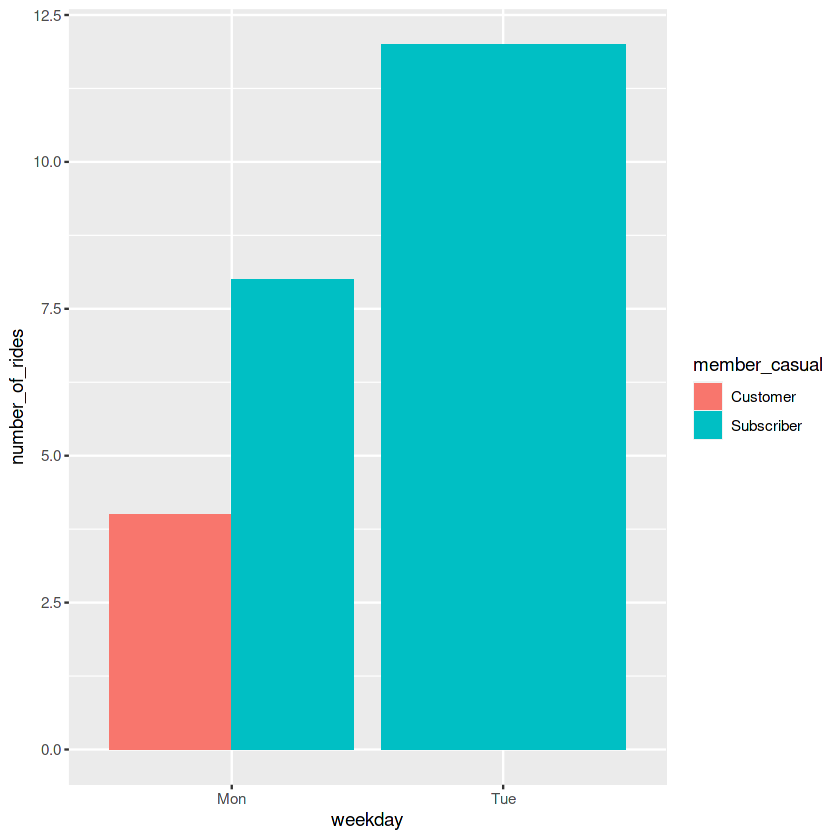

In [16]:
# ########### the average ride time for members vs casual users###############
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual + TY2019_rides$day_of_week, FUN = mean)

# ##Notice that the days of the week are out of order. Let's fix that###########
TY2019_rides$day_of_week <- ordered(TY2019_rides$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

# Now, let's run the average ride time by each day for members vs casual users
aggregate(TY2019_rides$ride_length ~ TY2019_rides$member_casual + TY2019_rides$day_of_week, FUN = mean)

##### rides by rider type ######
TY2019_rides %>%
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")


`summarise()` has grouped output by 'member_casual'. You can override using the `.groups` argument.



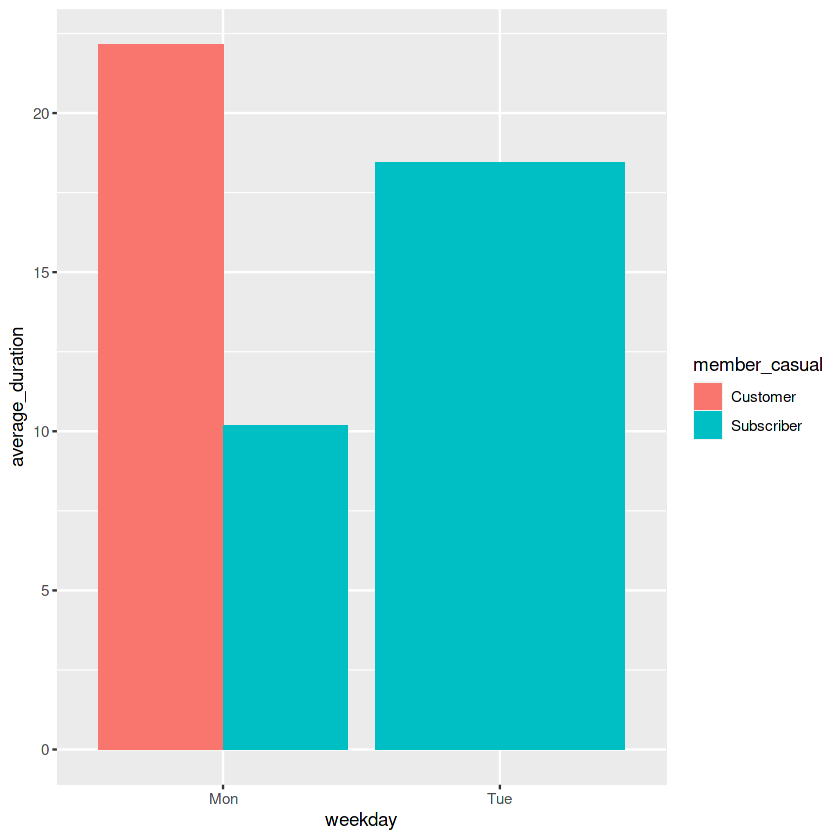

In [17]:
##### Let's create a visualization for average duration #####
TY2019_rides%>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")


**Final Recommendations**
To retain membered customers as well as to attract new memberships, the company should look into creating reward programs. -Such programs would entail things such as the Tuesday 'Fun Ride' program: Since the data shows that most members ride on Tuesday's, Cyclistsic can have a program where 'x' amount of family and friend can ride on a ride pass for a certain time limit to create a more family/friendly type ride event.

-Fitness program: There can be an annual rewards program for meeting fitness objective. For example, there can be a bronze, silver and gold teir for members whereby the goal is to beat the Median (Bronze), Mean(Silver) and Max(Gold) times set by the previous year. Acheiving these goals would allow members to receive some type of reward, for example, free ride_share for a month if gold medal is acheived

Encourage the reward programs for members would aslo be a good way of attracting current customers to sign up for memebership as they would see the value of owning a memebership. Currently, based on the data provided there is not incentive to mke customers want to have a membership.
-End.